In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
links=[]
dates=['190323','190330','190406','190413','190420','190427','190504','190511','190518','190525','190601']
links=[f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt" for date in dates]
print (links[0])
print(len(links))

http://web.mta.info/developers/data/nyct/turnstile/turnstile_190323.txt
11


In [3]:
df0=pd.read_csv(links[0])
df1=pd.read_csv(links[1])
df2=pd.read_csv(links[2])
df3=pd.read_csv(links[3])
df4=pd.read_csv(links[4])
df5=pd.read_csv(links[5])
df6=pd.read_csv(links[6])
df7=pd.read_csv(links[7])
df8=pd.read_csv(links[8])
df9=pd.read_csv(links[9])
df10=pd.read_csv(links[10])

mta_df=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [4]:
mta_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


In [5]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248180 entries, 0 to 203794
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [6]:
mta_df["DATETIME"]=pd.to_datetime(mta_df["DATE"]+" "+mta_df["TIME"],infer_datetime_format=True)

In [7]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248180 entries, 0 to 203794
Data columns (total 12 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   C/A                                                                   object        
 1   UNIT                                                                  object        
 2   SCP                                                                   object        
 3   STATION                                                               object        
 4   LINENAME                                                              object        
 5   DIVISION                                                              object        
 6   DATE                                                                  object        
 7   TIME                                                                  obj

In [8]:
mta_df.rename(columns={"C/A":"CA"}, inplace=True)
mta_df.columns=[column.strip() for column in mta_df.columns]
mta_df.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME'],
      dtype='object')

In [9]:
mta_df.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,20:00:00,REGULAR,6981415,2367704,2019-03-16 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,00:00:00,REGULAR,6981564,2367731,2019-03-17 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,04:00:00,REGULAR,6981579,2367731,2019-03-17 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,08:00:00,REGULAR,6981587,2367743,2019-03-17 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2019,12:00:00,REGULAR,6981655,2367794,2019-03-17 12:00:00


In [10]:
dupes=mta_df[mta_df.duplicated()]
dupes

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME


In [11]:
mta_df['LINENAME']=mta_df["LINENAME"].apply(lambda x:''.join(sorted(x)))


In [12]:
mta_df.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [13]:
mta_df.loc[(mta_df.STATION=='1 AVE')& (mta_df.LINENAME=="L"),"STATION"]='1 AV'
mta_df.loc[(mta_df.STATION=='42 ST-GRD CNTRL')& (mta_df.LINENAME=='4567S'), "STATION"]="GRD CNTRL-42 ST"

In [14]:
mta_df["TURNSTILE"]=mta_df["CA"]+" "+mta_df["UNIT"]+" "+mta_df["SCP"]+" "+mta_df["STATION"]
mta_df["TURNSTILE"].head()

0    A002 R051 02-00-00 59 ST
1    A002 R051 02-00-00 59 ST
2    A002 R051 02-00-00 59 ST
3    A002 R051 02-00-00 59 ST
4    A002 R051 02-00-00 59 ST
Name: TURNSTILE, dtype: object

In [15]:
##can't use sum since these entries are from several times during the same day    
mta_df.groupby(['TURNSTILE','DATETIME']).ENTRIES.count().reset_index().sort_values("ENTRIES",ascending=False)

,TURNSTILE,DATETIME,ENTRIES
1098548,N519 R461 00-03-01 B'WAY-LAFAYETTE,2019-03-24 01:00:00,2
325181,G009 R151 02-00-04 CONEY IS-STILLW,2019-05-16 17:00:00,2
1836664,R283 R221 00-00-00 167 ST,2019-04-15 16:00:00,2
1836663,R283 R221 00-00-00 167 ST,2019-04-15 12:00:00,2
1098547,N519 R461 00-03-01 B'WAY-LAFAYETTE,2019-03-23 21:00:00,2
...,...,...,...
749375,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 12:00:00,1
749374,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 08:00:00,1
749373,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 04:00:00,1
749372,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-26 00:00:00,1


In [16]:
mta_df.drop_duplicates(subset=["TURNSTILE","DATETIME"],inplace=True)

In [17]:
mta_df.groupby(['TURNSTILE','DATETIME']).ENTRIES.count().reset_index().sort_values("ENTRIES",ascending=False)

,TURNSTILE,DATETIME,ENTRIES
0,A002 R051 02-00-00 59 ST,2019-03-16 00:00:00,1
1498747,R142 R293 01-00-00 34 ST-PENN STA,2019-03-20 10:00:00,1
1498741,R142 R293 01-00-00 34 ST-PENN STA,2019-03-19 10:00:00,1
1498742,R142 R293 01-00-00 34 ST-PENN STA,2019-03-19 14:00:00,1
1498743,R142 R293 01-00-00 34 ST-PENN STA,2019-03-19 18:00:00,1
...,...,...,...
749365,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 20:00:00,1
749364,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 16:00:00,1
749363,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 12:00:00,1
749362,N141 R356 00-00-00 OZONE PK LEFFRT,2019-05-24 08:36:34,1


In [18]:
mta_daily=(mta_df
          .groupby(['CA','UNIT','SCP','STATION','TURNSTILE','DATE'],as_index=False)
          .ENTRIES.first())
mta_daily.head()

,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/16/2019,6980704
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/17/2019,6981564
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/18/2019,6982134
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/19/2019,6983646
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/20/2019,6985159


In [19]:
mta_daily[["PREV_DATE","PREV_ENTRIES"]]=(mta_daily
                                        .groupby(["CA",'UNIT','SCP','STATION',"TURNSTILE"])['DATE','ENTRIES']
                                        .apply(lambda grp:grp.shift(1)))
mta_daily.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/16/2019,6980704,NaN,NaN
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/17/2019,6981564,03/16/2019,6980704.0
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/18/2019,6982134,03/17/2019,6981564.0
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/19/2019,6983646,03/18/2019,6982134.0
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/20/2019,6985159,03/19/2019,6983646.0


In [20]:
mta_daily.dropna(subset=["PREV_DATE"],axis=0,inplace=True)

In [21]:
mta_daily[mta_daily["ENTRIES"]<mta_daily["PREV_ENTRIES"]].head()

,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
6036,A025,R023,01-03-01,34 ST-HERALD SQ,A025 R023 01-03-01 34 ST-HERALD SQ,03/17/2019,1238618405,03/16/2019,1.238622e+09
6037,A025,R023,01-03-01,34 ST-HERALD SQ,A025 R023 01-03-01 34 ST-HERALD SQ,03/18/2019,1238615918,03/17/2019,1.238618e+09
6038,A025,R023,01-03-01,34 ST-HERALD SQ,A025 R023 01-03-01 34 ST-HERALD SQ,03/19/2019,1238611834,03/18/2019,1.238616e+09
6039,A025,R023,01-03-01,34 ST-HERALD SQ,A025 R023 01-03-01 34 ST-HERALD SQ,03/20/2019,1238607734,03/19/2019,1.238612e+09
6040,A025,R023,01-03-01,34 ST-HERALD SQ,A025 R023 01-03-01 34 ST-HERALD SQ,03/21/2019,1238603605,03/20/2019,1.238608e+09


In [22]:
(mta_daily[mta_daily["ENTRIES"]<mta_daily["PREV_ENTRIES"]].groupby(["CA","UNIT","SCP","STATION","TURNSTILE"]).size())

CA    UNIT  SCP       STATION          TURNSTILE                         
A025  R023  01-03-01  34 ST-HERALD SQ  A025 R023 01-03-01 34 ST-HERALD SQ    76
A038  R085  00-00-01  8 ST-NYU         A038 R085 00-00-01 8 ST-NYU            1
A039  R085  01-00-01  8 ST-NYU         A039 R085 01-00-01 8 ST-NYU            1
A042  R086  01-00-04  PRINCE ST        A042 R086 01-00-04 PRINCE ST           1
A046  R463  00-00-03  CANAL ST         A046 R463 00-00-03 CANAL ST            1
                                                                             ..
R623  R061  00-00-01  NOSTRAND AV      R623 R061 00-00-01 NOSTRAND AV         2
R629  R065  00-00-00  ROCKAWAY AV      R629 R065 00-00-00 ROCKAWAY AV         1
R645  R110  00-03-00  FLATBUSH AV-B.C  R645 R110 00-03-00 FLATBUSH AV-B.C     1
R646  R110  01-00-01  FLATBUSH AV-B.C  R646 R110 01-00-01 FLATBUSH AV-B.C    76
R730  R431  00-00-04  EASTCHSTER/DYRE  R730 R431 00-00-04 EASTCHSTER/DYRE    72
Length: 291, dtype: int64

In [23]:
def daily_counts(row,max_counter):
    counter=row["ENTRIES"]-row["PREV_ENTRIES"]
    if counter <0:
        counter =-counter
    if counter>max_counter:
        print(row["ENTRIES"],row["PREV_ENTRIES"])
        return 0
    return counter
mta_daily["DAILY_ENTRIES"]=mta_daily.apply(daily_counts, axis=1, max_counter=100000)

1377181 4960567.0
463403 299330.0
191 2234479.0
235 111673.0
1148 127446.0
3 67586581.0
2055 221540.0
158 1087620.0
442 1094886.0
1583 293030.0
458840 819407.0
786769 587727.0
808 1164049.0
258 1973065.0
413 1131102.0
585 2131081.0
379 1333982.0
6 913957.0
882 15418815.0
33611839 186068.0
196696 1969149.0
458927 1265107.0
28 117494.0
277 474466.0
338 204225.0
2549 102780.0
754 175979.0
1048 137261.0
1435 4767402.0
458754 5064.0
458753 13389.0
335092671 3422305.0
412 3073070.0
161 4605408.0
606 2225923.0
146 6879516.0
95 1081474.0
681 6527713.0
614 360760.0
2254 238251.0
569320813 4807409.0
405 4762343.0
459246 1619264.0
66269 460807.0
385 321292.0
279 9029146.0
199 324008.0
560 8944629.0
65536 839317244.0
262 167277.0
234929320 973775.0
184608117 746094.0
134224779 546226.0
881 1835264168.0
458761 142.0
238 2898346.0
50 1544092.0
110 333007.0
607 3912014.0
49 2279883.0
3633688 2361207.0
393030 3633682.0
26 392176.0
35 791356.0
1313 6625277.0
196614 2998692.0
154 7978260.0
1455 144814.0

In [24]:
mta_daily

,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/17/2019,6981564,03/16/2019,6980704.0,860.0
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/18/2019,6982134,03/17/2019,6981564.0,570.0
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/19/2019,6983646,03/18/2019,6982134.0,1512.0
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/20/2019,6985159,03/19/2019,6983646.0,1513.0
5,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,03/21/2019,6986742,03/20/2019,6985159.0,1583.0
...,...,...,...,...,...,...,...,...,...,...
372196,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/27/2019,5554,05/26/2019,5554.0,0.0
372197,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/28/2019,5554,05/27/2019,5554.0,0.0
372198,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/29/2019,5554,05/28/2019,5554.0,0.0
372199,TRAM2,R469,00-05-01,RIT-ROOSEVELT,TRAM2 R469 00-05-01 RIT-ROOSEVELT,05/30/2019,5554,05/29/2019,5554.0,0.0


In [25]:
X=mta_daily[mta_daily['TURNSTILE']=='A002 R051 02-00-00 59 ST']

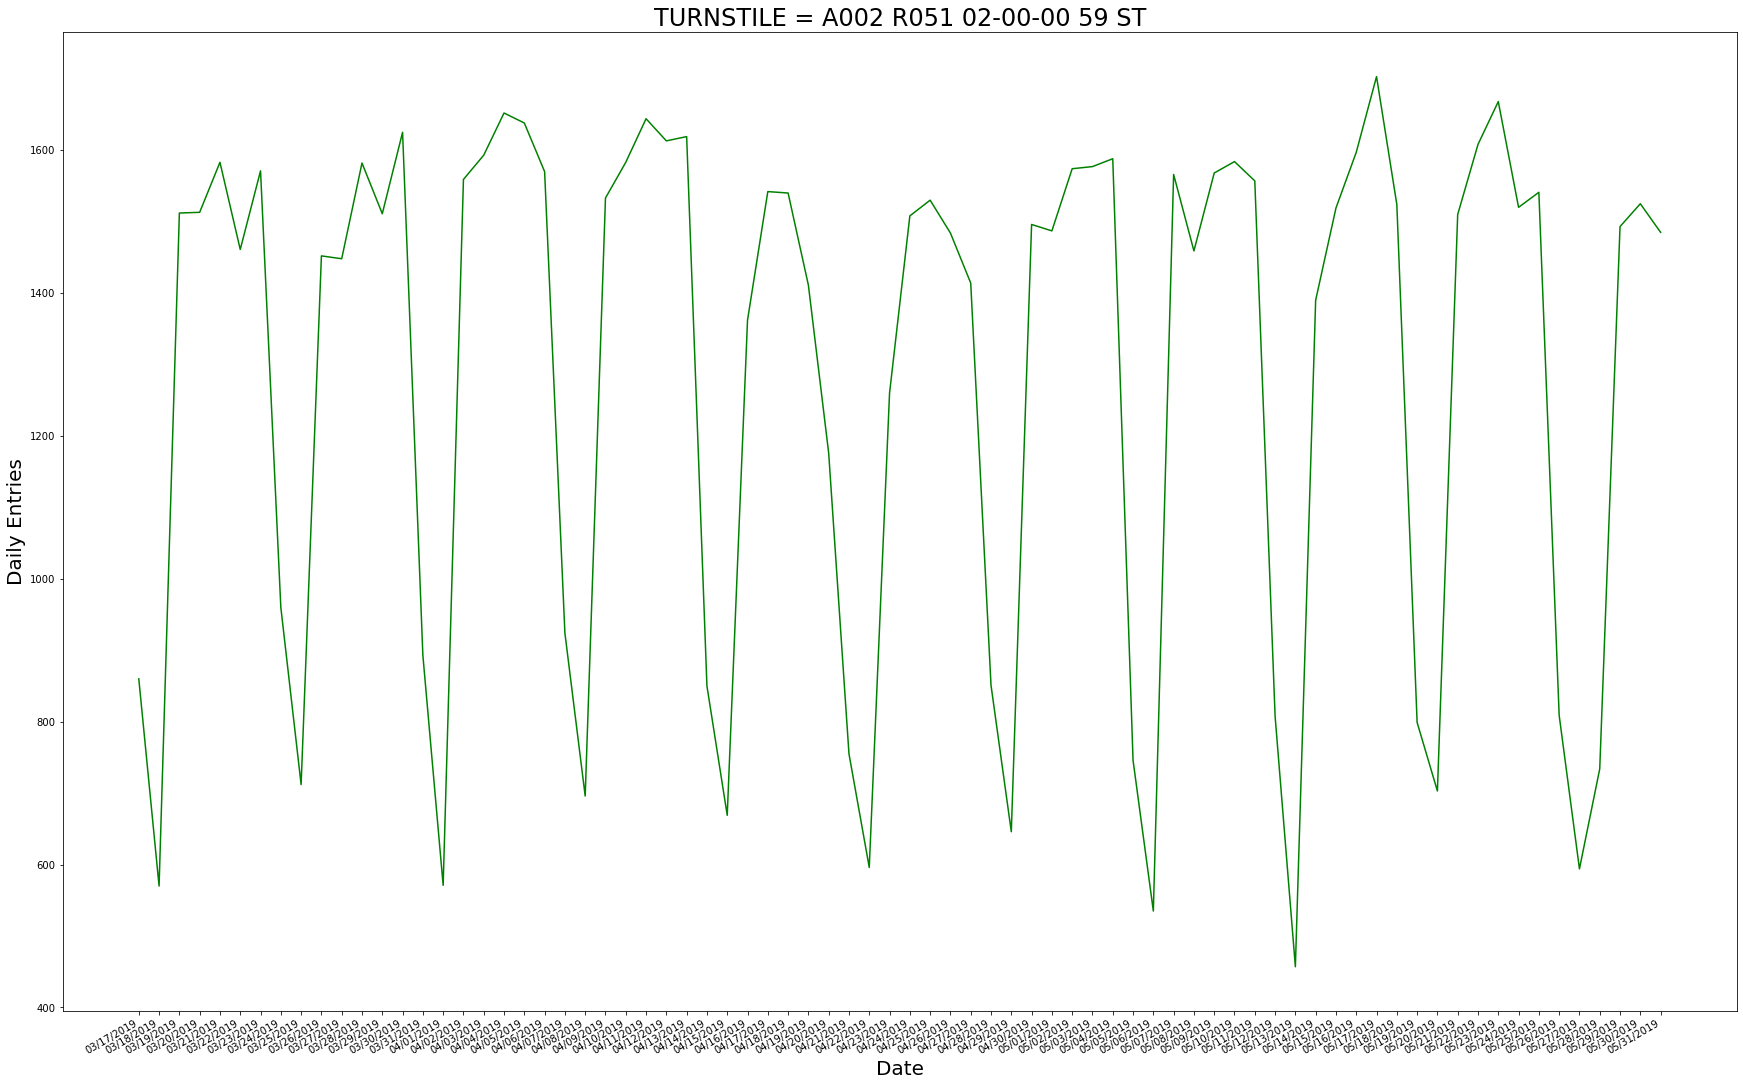

In [26]:
fig=plt.figure(figsize=(30,20))
plt.plot(X['DATE'],X['DAILY_ENTRIES'],'g')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Daily Entries',fontsize=20)
plt.title('TURNSTILE = A002 R051 02-00-00 59 ST',fontsize=24)
fig.autofmt_xdate()
plt.show()

In [27]:
## Challenge 5: ##
## for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo ##

mta_bycombo = mta_daily.groupby(['CA','UNIT','STATION','DATE']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
mta_bycombo

,CA,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,03/17/2019,7793.0
1,A002,R051,59 ST,03/18/2019,5970.0
2,A002,R051,59 ST,03/19/2019,12763.0
3,A002,R051,59 ST,03/20/2019,13321.0
4,A002,R051,59 ST,03/21/2019,13518.0
...,...,...,...,...,...
56380,TRAM2,R469,RIT-ROOSEVELT,05/27/2019,3629.0
56381,TRAM2,R469,RIT-ROOSEVELT,05/28/2019,4286.0
56382,TRAM2,R469,RIT-ROOSEVELT,05/29/2019,2610.0
56383,TRAM2,R469,RIT-ROOSEVELT,05/30/2019,2889.0


In [28]:
## Challenge 6: ##
## combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station ##

mta_bystation=mta_bycombo.groupby(['STATION','DATE']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
mta_bystation['STATION'].unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '163 ST-AMSTERDM', '167 ST',
       '168 ST', '169 ST', '170 ST', '174 ST', '174-175 STS', '175 ST',
       '176 ST', '18 AV', '18 ST', '181 ST', '182-183 STS', '183 ST',
       '190 ST', '191 ST', '2 AV', '20 AV', '207 ST', '21 ST',
       '21 ST-QNSBRIDGE', '215 ST', '219 ST', '225 ST', '23 ST', '231 ST',
       '233 ST', '238 ST', '25 AV', '25 ST', '28 ST', '3 AV',
       '3 AV 138 ST', '3 AV-149 ST', '30 AV', '33 ST', '33 ST-RAWSON ST',
       '34 ST-HERALD SQ', '34 ST-HUDSON YD', '34 ST-PENN STA', '36 AV',
       '36 ST', '39 AV', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST',
       '46 ST BLISS ST', '47-50 STS ROCK

In [29]:
mta_bystation=mta_bycombo.groupby(['STATION','DATE']).agg({'DAILY_ENTRIES':'sum'}).reset_index()


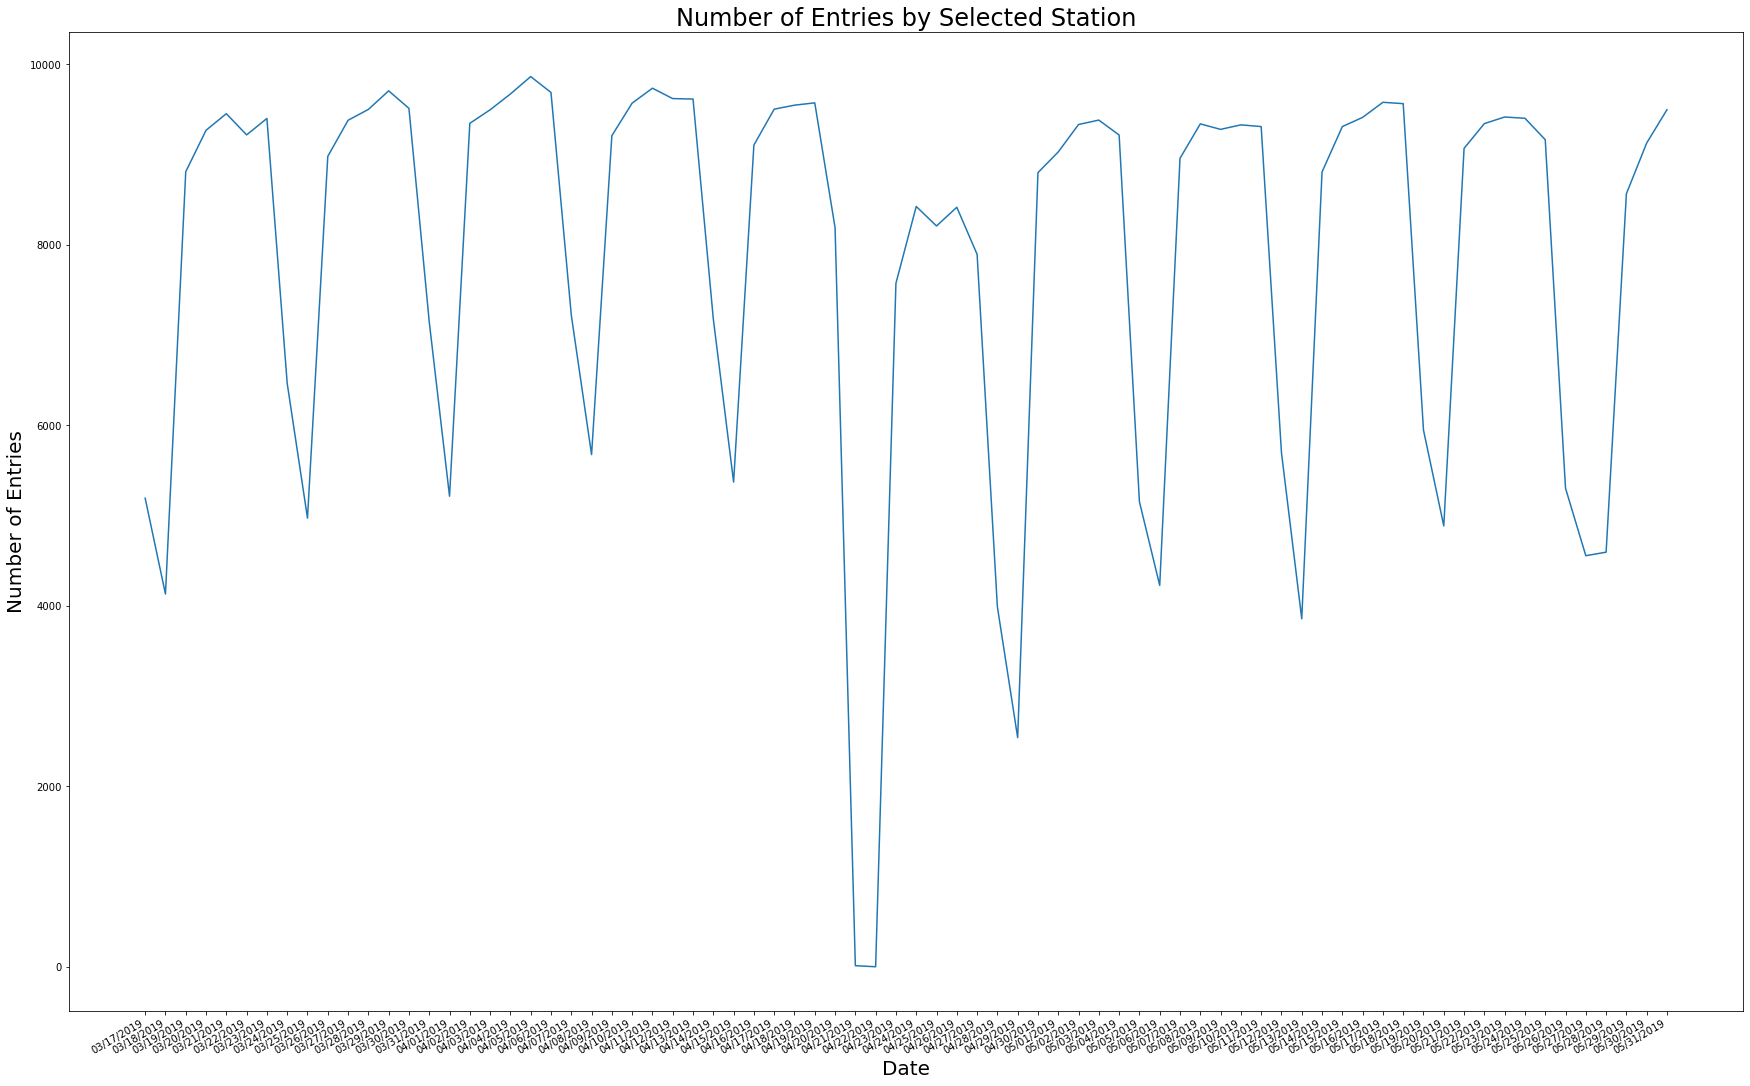

In [30]:
## Challenge 7: ##
## Plot the daily time series for a station ##

Station1=mta_bystation[mta_bystation['STATION']=='BEDFORD-NOSTRAN']

fig=plt.figure(figsize=(30,20))
plt.plot(Station1['DATE'],Station1['DAILY_ENTRIES'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of Entries',fontsize=20)
plt.title('Number of Entries by Selected Station',fontsize=24)
fig.autofmt_xdate()
plt.show()

In [32]:
## Challenge 8 ##
## Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. ##

mta_daily['DATE']=pd.to_datetime(mta_daily['DATE'], errors='coerce')
mta_daily['WEEKDAY'] = mta_daily['DATE'].dt.day_name()
mta_daily['WEEKDAY_INDEX'] = mta_daily['DATE'].dt.weekday
mta_daily['WEEK_OF_YEAR']=mta_daily['DATE'].dt.week
mta_daily.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,CA,UNIT,SCP,STATION,TURNSTILE,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,WEEKDAY,WEEKDAY_INDEX,WEEK_OF_YEAR
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-17,6981564,03/16/2019,6980704.0,860.0,Sunday,6,11
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-18,6982134,03/17/2019,6981564.0,570.0,Monday,0,12
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-19,6983646,03/18/2019,6982134.0,1512.0,Tuesday,1,12
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-20,6985159,03/19/2019,6983646.0,1513.0,Wednesday,2,12
5,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,2019-03-21,6986742,03/20/2019,6985159.0,1583.0,Thursday,3,12


In [33]:
Station2=mta_daily.query('STATION == "59 ST"').reset_index()

mta_byweek=Station2.groupby(['STATION','DATE','WEEK_OF_YEAR','WEEKDAY']).agg({'DAILY_ENTRIES':'sum'}).reset_index()
mta_byweek

,STATION,DATE,WEEK_OF_YEAR,WEEKDAY,DAILY_ENTRIES
0,59 ST,2019-03-17,11,Sunday,38599.0
1,59 ST,2019-03-18,12,Monday,27016.0
2,59 ST,2019-03-19,12,Tuesday,64622.0
3,59 ST,2019-03-20,12,Wednesday,67971.0
4,59 ST,2019-03-21,12,Thursday,68273.0
...,...,...,...,...,...
71,59 ST,2019-05-27,22,Monday,26381.0
72,59 ST,2019-05-28,22,Tuesday,28470.0
73,59 ST,2019-05-29,22,Wednesday,65266.0
74,59 ST,2019-05-30,22,Thursday,68590.0


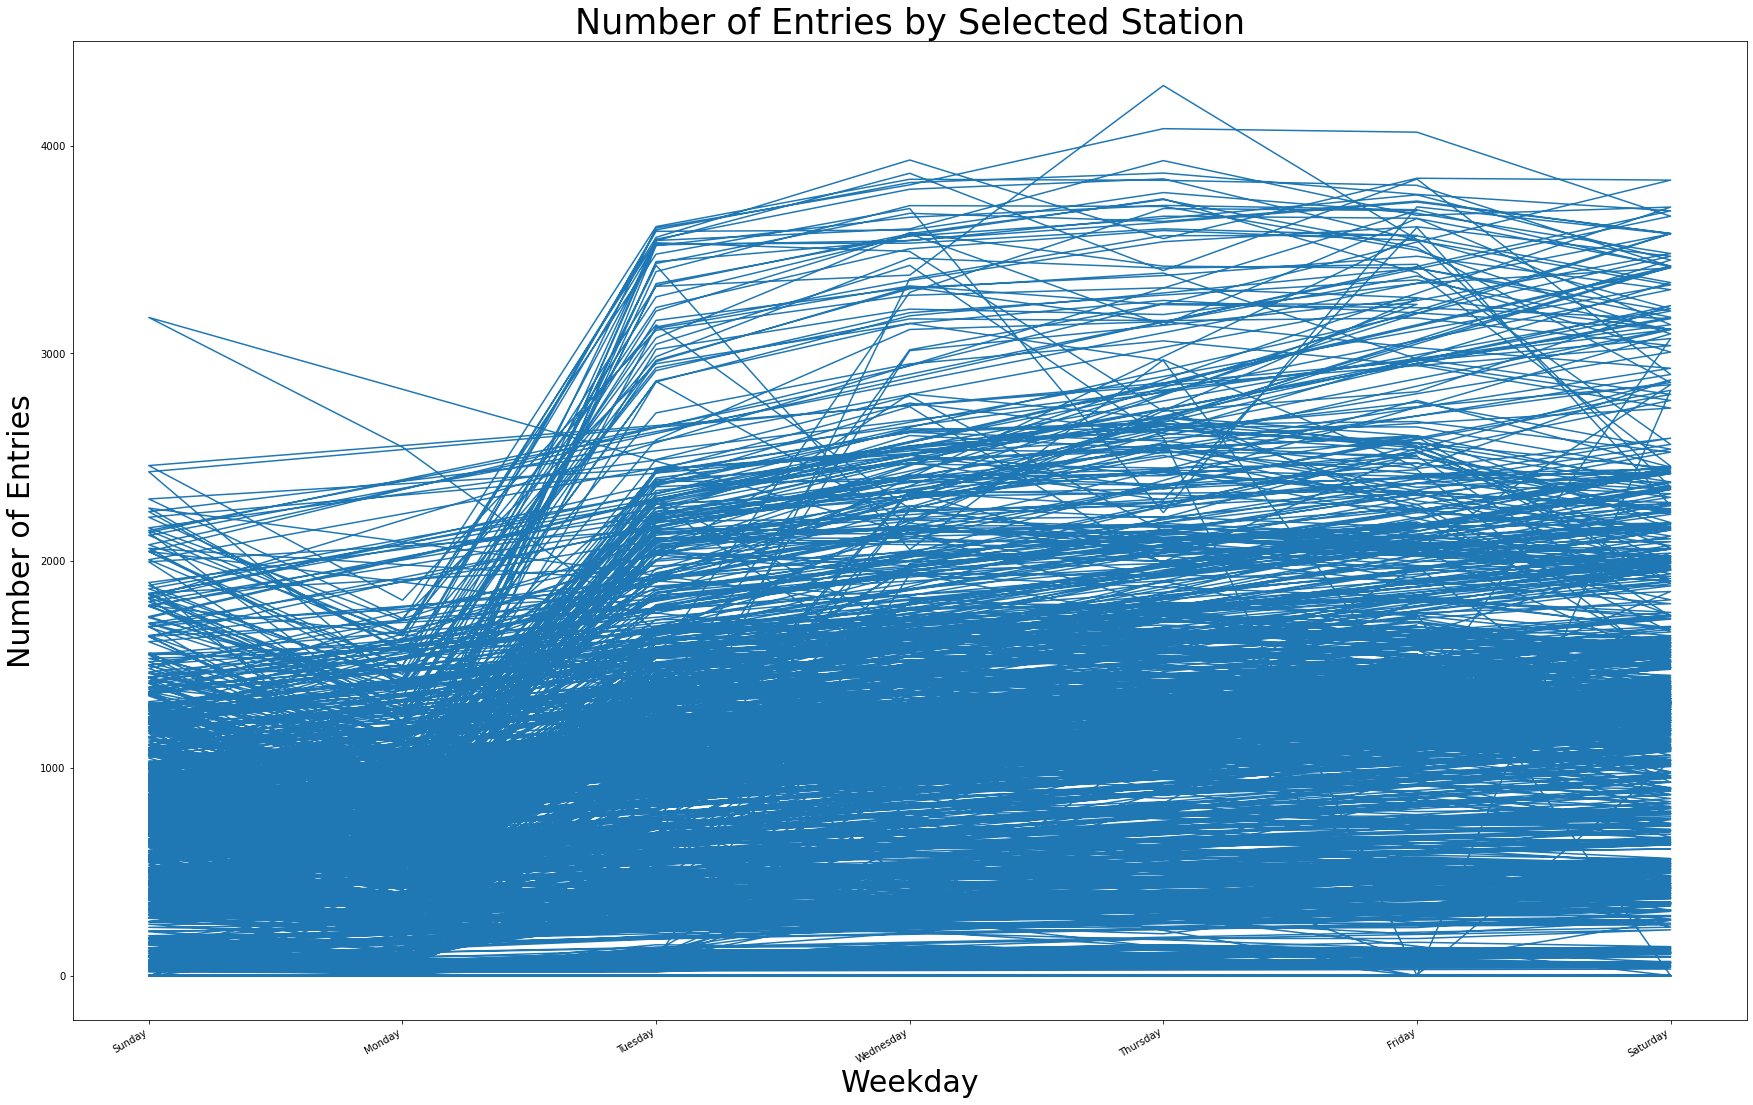

In [34]:
## This is not the correct way to plot, add a FOR loop later ##
fig=plt.figure(figsize=(30,20))
plt.plot(Station2['WEEKDAY'],Station2['DAILY_ENTRIES'])
plt.xlabel('Weekday',fontsize=30)
plt.ylabel('Number of Entries',fontsize=30)
plt.title('Number of Entries by Selected Station',fontsize=35)
fig.autofmt_xdate()
plt.show()

In [ ]:
##Challenge 9##
##Over multiple weeks, sum total ridership for each station and sort them##

busiest_station = daily_entries_new.groupby(['Station']).sum()
busiest_station = busiest_turnstile_df.sort_values(by='Entries',ascending=False)
busiest_station.reset_index(inplace=True)
busiest_station.head(10)

In [ ]:
##Challenge 10##

plt.hist(busiest_station)

In [35]:
daily_stations= (mta_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index())
daily_stations.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2019-03-17,5.0
1,1 AV,2019-03-18,2.0
2,1 AV,2019-03-19,18473.0
3,1 AV,2019-03-20,19996.0
4,1 AV,2019-03-21,20027.0


In [36]:
top_10_stations=(daily_stations.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                .reset_index()
                .sort_values(by='DAILY_ENTRIES', ascending=False)
                .STATION.head(10))
top_10_stations

61      34 ST-PENN STA
233    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
68     42 ST-PORT AUTH
14      14 ST-UNION SQ
353     TIMES SQ-42 ST
226          FULTON ST
110              86 ST
9               125 ST
Name: STATION, dtype: object